# Introduction

The goal of this project is to analyze biodiveristy data from some of the US's National Parks.

This report will clean, plot, and analyze data to explain the findings of the analysis.


Here are the questions this report will answer:
1.  Are certain types of species more likely to be endangered than others?
2.  What is the distribution of each conservation status?
3.  Which species is most prevalent across the parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.



### Scope

**Project Goals**

The goal of this project is to analyze data provided by Codecademy.  The National Parks Service wants to know the relationship between species location and their conservation status so they know how to provide for more endangered species to maintain the current level of biodiversity in its parks. 

**Data**

`Observations.csv`
- scientific_name
- park_name
- observations

`Species_info.csv`
- category
- scientific_name
- common_names
- conservatoin_status

#### Importing Python packages

In [114]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

#### Loading the Data

In [115]:
#Observations
observations = pd.read_csv('observations.csv', encoding='utf-8')

observations.head(10)


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [116]:
#Species
species = pd.read_csv('species_info.csv', encoding='utf-8')

species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


## What does the data look like?

In [117]:
#shape of the data
print("observations.csv:")
print("Columns: " + str(observations.shape[1]))
print("Rows: " + str(observations.shape[0]))
print("\n")

print("species_info.csv:")
print("Columns: " + str(species.shape[1]))
print("Rows: " + str(species.shape[0]))


observations.csv:
Columns: 3
Rows: 23296


species_info.csv:
Columns: 4
Rows: 5824


In [118]:
unique_species = observations.scientific_name.nunique()
print("Unique species count: " + str(unique_species))

unique_parks = observations.park_name.nunique()
print("Number of parks: " + str(unique_parks))
print("Parks: ")
list=1
for i in observations.park_name.unique():
    print(str(list) + ". " + i)
    list += 1



Unique species count: 5541
Number of parks: 4
Parks: 
1. Great Smoky Mountains National Park
2. Yosemite National Park
3. Bryce National Park
4. Yellowstone National Park


In [119]:
#categories of species:
unique_category = species.category.nunique()
print("Unique Categories: " + str(unique_category))
print("Categories: ")
list=1
for i in species.category.unique():
    print(str(list) + ". " + i)
    list += 1

Unique Categories: 7
Categories: 
1. Mammal
2. Bird
3. Reptile
4. Amphibian
5. Fish
6. Vascular Plant
7. Nonvascular Plant


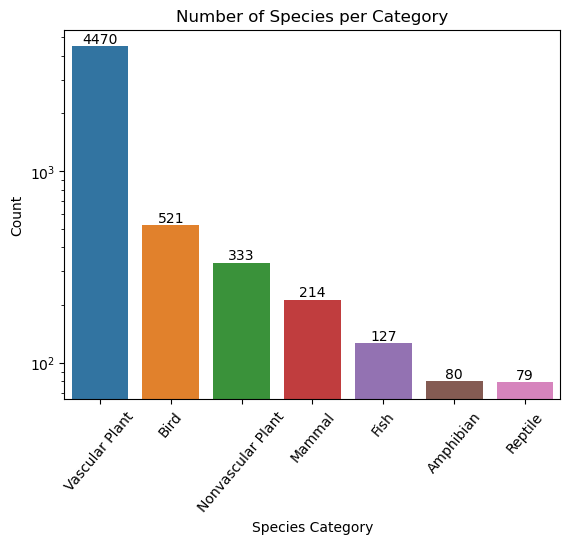

<Figure size 640x480 with 0 Axes>

In [120]:
#Graph of num species per category
ax = plt.subplot()
sns.countplot(x=species.category, data=species, order=['Vascular Plant','Bird','Nonvascular Plant','Mammal',
                                                       'Fish','Amphibian','Reptile'])
plt.xticks(rotation=50)
ax.bar_label(ax.containers[0])
plt.ylabel("Count")
plt.xlabel("Species Category")
plt.title("Number of Species per Category")
plt.yscale('log')


plt.show()
plt.clf()

Lets have a look at how many species fall under each category:

In [121]:
species.groupby("category").size()


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [122]:
#summary statistics for species
print(species.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


In [123]:
#summary statistics for observations
print(observations.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


## Cleaning the Data

##### How much of our data is missing?

In [124]:
# counts the number of missing values in each column of species
species.isna().sum() 

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [125]:
# counts the number of missing values in each column of observations
observations.isna().sum() 

scientific_name    0
park_name          0
observations       0
dtype: int64

As we can see, only the conservation_status column in the `species_info.csv` file has missing data.  Since the missing data is in the conservation_status, this may mean the species is not endangered, not protected, or simply no data is available.  We will fill these na's with "No Protection".

In [126]:
#fill in missing conservation statuses
species["conservation_status"] = species["conservation_status"].fillna("No Protection")

#confirmation missing data has been filled:
species.isna().sum() 

category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64

## Analysis 1: Categories of Species and Protection Status

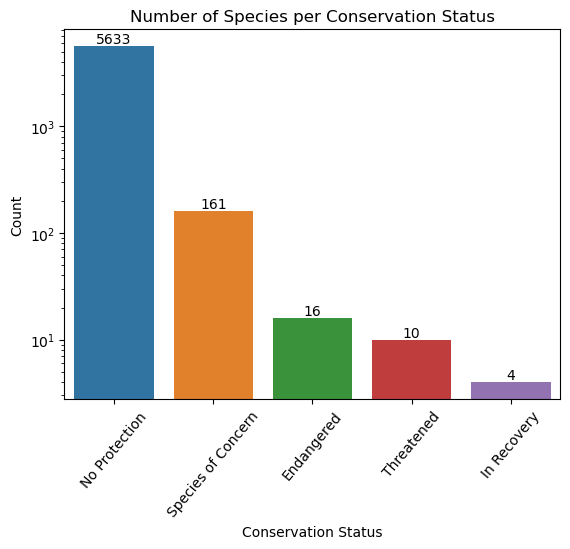

<Figure size 640x480 with 0 Axes>

In [127]:
#Graph of num species per status
ax = plt.subplot()
sns.countplot(x=species.conservation_status, data=species)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=50)
plt.yscale('log')


plt.ylabel("Count")
plt.xlabel("Conservation Status")
plt.title("Number of Species per Conservation Status")

plt.show()
plt.clf()

As we can see, there are significantly more species that fall under the "No Protection" category.  While this is great news, it doesnt show any sort of trends.  Lets break this down and see how many of each category of species falls under each conservation status.

In [128]:
speciesStatus = species[species.conservation_status != 'No Protection'].groupby(
    ["conservation_status","category"])["common_names"].count().unstack()

speciesStatus.fillna("0")

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,0,0,1.0
In Recovery,0,3.0,0,1.0,0,0,0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,0,4.0,2.0,0,0,2.0


It looks like most species fall under the "Species of Concern" category.  Lets visualize this:

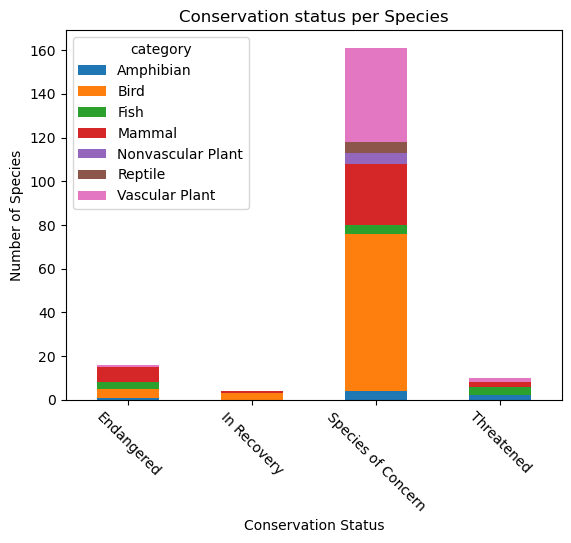

<Figure size 640x480 with 0 Axes>

In [129]:
speciesStatus.plot(kind='bar', stacked=True)
plt.ylabel("Number of Species")
plt.xlabel("Conservation Status")
plt.title("Conservation status per Species")
plt.xticks(rotation = -45)

plt.show()
plt.clf()

Are there certain categories of species that are more likely to be endangered than others?

In [130]:
#create a new column to track if the species has no protection
species['is_protected'] = species.conservation_status != 'No Protection'

countStatus = species.groupby(["category","is_protected"]).scientific_name.nunique().reset_index().pivot(
    index="category", columns="is_protected", values="scientific_name").reset_index()

countStatus.columns = ["Category", "Not Protected", "Protected"]

countStatus["Percent Protected"] = countStatus["Protected"] / (countStatus["Not Protected"] + countStatus["Protected"]) * 100

countStatus

,Category,Not Protected,Protected,Percent Protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


From this we can see that Birds and Mammals are proportionally the most protected with Birds having a ~15% protection rate and Mammals have ~17% protection rate. Is this stastically significant?

In [131]:
from scipy.stats import chi2_contingency

cont1 = [[30,146],[75,413]]

chi2_contingency(cont1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

1. From the Chi Squared Contingency we can get the p value for the comparison of Birds and Mammals.  The standard p-value to test stasticial significance is 0.05.  From the above results the p-value is approximately 0.69 which is more than the 0.05 meaning there is no significant relationship between the protection rate of Birds and Mammals.

Lets have a look at the p-value from the chi squared contingency to see if there is a statistically significant relationship between Vascular and Nonvascular Plant.

In [132]:
cont2 = [[46,4216],[5,328]]

chi2_contingency(cont2)

Chi2ContingencyResult(statistic=0.1906912123381206, pvalue=0.6623419491381985, dof=1, expected_freq=array([[4.73040261e+01, 4.21469597e+03],
       [3.69597388e+00, 3.29304026e+02]]))

2. From this measurements p-value of .66, we can safely say there is no significant relationsihp between the protection rate of Vascular and Nonvascular plants.

Lets have a look at to species groups who's percent protected are not too close in value like the previously measured comparisons.  Lets have a look at Reptiles and Mammals.

In [133]:
cont3 = [[30,146], [5,73]]

chi2_contingency(cont3)



Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

From these results we can see that the p-value is less than 0.05 at 0.04.  This indicates there is a stasticially significant relationship between Reptiles and Mammals and the amount protected.

## Analysis 2: National Parks and Protection Status

Since the protection status and national parks are in separate dataframes, we will need to merge the two dataframes.  In order to do this, we need to decide how values from one table are mapped to the other, in this case both dataframes have the `scientific_name` column so these two dataframes will mapped using this column,

In [134]:
#combining both dataframes
combined = species.merge(observations)


#dropping duplicate rows
combined = combined.drop_duplicates()

combined.head()

,category,scientific_name,common_names,conservation_status,is_protected,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Protection,False,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Protection,False,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Protection,False,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Protection,False,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Protection,False,Yosemite National Park,128


In [154]:
#What are the unique National Parks:
# park_list = []
# unique_park = combined.park_name.unique()

# for i in unique_park:
#     park_list.append(i)
    

# protectedPark = combined.groupby(['park_name']).is_protected.sum().reset_index()


protectedPark = combined.groupby(["park_name","is_protected"]).scientific_name.nunique().reset_index().pivot(
    index="park_name", columns="is_protected", values="scientific_name").reset_index()

# countStatus["Percent Protected"] = countStatus["Protected"] / (countStatus["Not Protected"] + countStatus["Protected"]) * 100


 

is_protected,park_name,False,True
0,Bryce National Park,5363,179
1,Great Smoky Mountains National Park,5363,179
2,Yellowstone National Park,5363,179
3,Yosemite National Park,5363,179


6406